In [69]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, Average, Dense
from keras.losses import categorical_crossentropy
from keras.models import Sequential, Model, Input
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
file_path = "/Users/joannakang/Desktop/machinelearning/electricity_prediction/simple_energy_consumption_prediction/final.csv"

In [71]:
df = pd.read_csv(file_path)

In [72]:
df = df[['energy', 'WS', 'TA', 'HM']]

In [73]:
df

,energy,WS,TA,HM
0,442.08,2.0,230.0,999.0
1,448.32,9.0,228.0,999.0
2,438.24,1.0,228.0,999.0
3,441.60,1.0,227.0,999.0
4,446.64,0.0,229.0,999.0
5,446.64,0.0,227.0,999.0
6,433.92,3.0,226.0,999.0
7,430.56,0.0,227.0,999.0
8,432.24,0.0,226.0,999.0
9,427.68,0.0,225.0,999.0


In [74]:
x_train = df[['WS', 'TA', 'HM']][0:2000]
y_train = df[['energy']][0:2000]

In [75]:
x_val = df[['WS', 'TA', 'HM']][2000:2500]
y_val = df[['energy']][2000:2500]

In [76]:
x_test = df[['WS', 'TA', 'HM']][2500:]
y_test = df[['energy']][2500:]

In [77]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [78]:
def deep_learning_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(3, activation="linear", input_shape=(x_size,)))
    t_model.add(Dense(7, activation="linear"))
    t_model.add(Dense(3, activation="relu"))                    
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(lr=1e-3, decay=0.0),
        metrics=['accuracy'])
    return(t_model)

In [79]:
model = deep_learning_model_1(x_train.shape[1], 1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_22 (Dense)             (None, 7)                 28        
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 24        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 4         
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________
None


In [80]:
epochs = 100
batch_size = 10

print('Epochs: ', epochs)
print('Batch_size: ', batch_size)

Epochs:  100
Batch_size:  10


In [81]:
history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=1, validation_data = (x_val, y_val))

Train on 2000 samples, validate on 500 samples
Epoch 1/100
2000/2000 [==============================] - 0s 183us/step - loss: 147501.9409 - accuracy: 0.0000e+00 - val_loss: 15328.1368 - val_accuracy: 0.0000e+00
Epoch 2/100
2000/2000 [==============================] - 0s 115us/step - loss: 23288.9488 - accuracy: 5.0000e-04 - val_loss: 15682.1089 - val_accuracy: 0.0000e+00
Epoch 3/100
2000/2000 [==============================] - 0s 172us/step - loss: 23063.4843 - accuracy: 0.0000e+00 - val_loss: 15285.7474 - val_accuracy: 0.0000e+00
Epoch 4/100
2000/2000 [==============================] - 0s 108us/step - loss: 22823.0984 - accuracy: 0.0000e+00 - val_loss: 17407.7436 - val_accuracy: 0.0000e+00
Epoch 5/100
2000/2000 [==============================] - 0s 108us/step - loss: 22512.4453 - accuracy: 0.0000e+00 - val_loss: 15234.5543 - val_accuracy: 0.0000e+00
Epoch 6/100
2000/2000 [==============================] - 0s 109us/step - loss: 22067.3367 - accuracy: 0.0000e+00 - val_loss: 14759.3021 -

Epoch 51/100
2000/2000 [==============================] - 0s 110us/step - loss: 20626.3923 - accuracy: 0.0000e+00 - val_loss: 17823.3501 - val_accuracy: 0.0000e+00
Epoch 52/100
2000/2000 [==============================] - 0s 109us/step - loss: 20570.9644 - accuracy: 0.0000e+00 - val_loss: 17786.0062 - val_accuracy: 0.0000e+00
Epoch 53/100
2000/2000 [==============================] - 0s 105us/step - loss: 20619.9963 - accuracy: 0.0000e+00 - val_loss: 17953.2003 - val_accuracy: 0.0000e+00
Epoch 54/100
2000/2000 [==============================] - 0s 120us/step - loss: 20581.8903 - accuracy: 0.0000e+00 - val_loss: 17718.3589 - val_accuracy: 0.0000e+00
Epoch 55/100
2000/2000 [==============================] - 0s 105us/step - loss: 20659.2579 - accuracy: 0.0000e+00 - val_loss: 17573.1784 - val_accuracy: 0.0000e+00
Epoch 56/100
2000/2000 [==============================] - 0s 105us/step - loss: 20559.6285 - accuracy: 0.0000e+00 - val_loss: 17794.6760 - val_accuracy: 0.0000e+00
Epoch 57/100
200

In [63]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

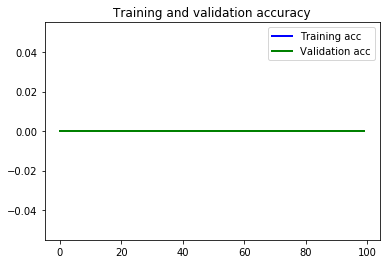

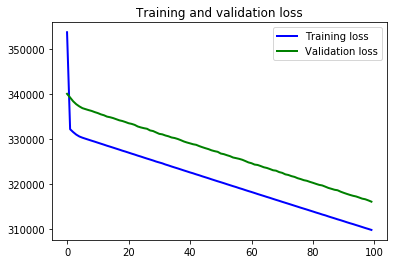

In [67]:
plt.rcParams['lines.linewidth'] = 2

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()